Dataset
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [1]:
# import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import random
%matplotlib inline
random.seed=0

In [2]:
df=pd.read_csv('iris.csv')
print('--'*50,'\n First 5 rows of dataset')
print(df.head())
print('--'*50,'\n Columns of dataset')
print('Columns', df.columns)
print('--'*50,'\n Description of dataset')
print(df.describe())
print('--'*50,'\n Null values in dataset')
print(df.isnull().sum())
df.drop(['Id'], axis=1, inplace=True)


---------------------------------------------------------------------------------------------------- 
 First 5 rows of dataset
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
---------------------------------------------------------------------------------------------------- 
 Columns of dataset
Columns Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 
 Description of dataset
               Id  SepalLengthCm  S

###### 1- There are no null values in the dataset
###### 2- Total data values are 150
###### 3- we have to remove ID and Species columns as we have to perform clustering

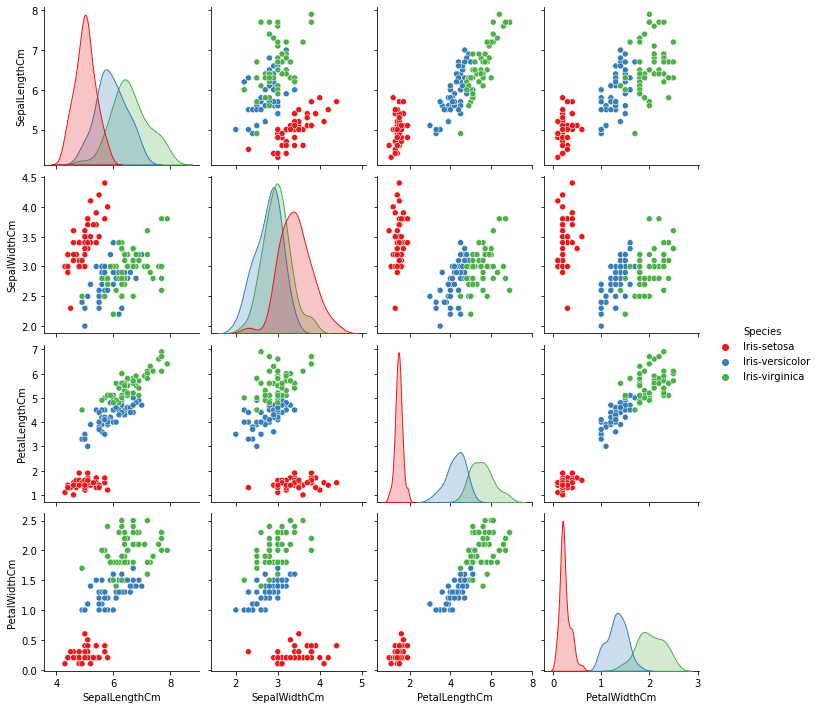

In [3]:
sns.pairplot(df, hue='Species', palette='Set1')

In [4]:
df.drop(['Species'], axis=1, inplace=True)
# As we have to cluster them, we should scale the data
mms=MinMaxScaler()
df_scaled=pd.DataFrame(mms.fit_transform(df))
df_scaled.columns=df.columns
joblib.dump(mms,'mms_scale.pkl')
df_scaled.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


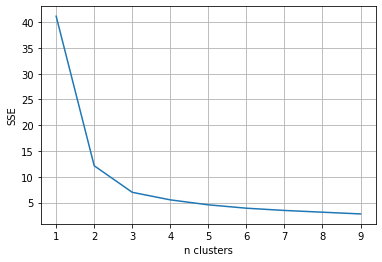

In [5]:
k_range=range(1,10)
sse=[]

for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit_predict(df_scaled)
    sse.append(km.inertia_)
    
plt.plot(k_range, sse)
plt.xlabel('n clusters')
plt.ylabel('SSE')
plt.grid()

With elbow method, We can see that the curve bends at n=3
Let's select n=3

In [6]:
km=KMeans(n_clusters=3)
df_scaled['cluster']=km.fit_predict(df_scaled)

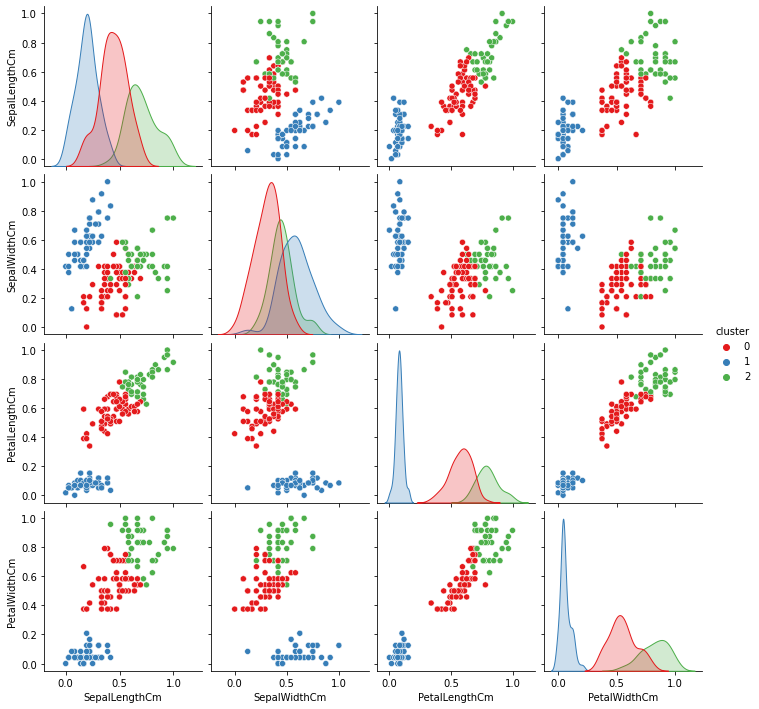

In [7]:
sns.pairplot(df_scaled, hue='cluster', palette='Set1')

After assigning the cluster and plotting the pairplot, we could see that Blue class is easily distinguishable from other two classes

Red and green classes have formed a cluster nearby each other, and there are few chances of getting placed in the wrong class

In [11]:
joblib.dump(km, 'iris_pred.pkl')

['iris_pred.pkl']